 **Evaluation Project - 7**
 
# Customer Churn Analysis

* Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [233]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [234]:
# reading dataset and checking shape of dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
pd.set_option("display.max_columns",None)
print("rows:",df.shape[0],"    columns:",df.shape[1])
df.head()

rows: 7043     columns: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [235]:
# As we have 31 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [236]:
# all values of this column is unique so i'll dop this column as it will not effect churn 
df.drop(['customerID'],axis=1,inplace=True)

In [237]:
# spliting into Numerical & Categorical 
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

In [238]:
# checking ' ','NA','-','?'
df.isin([' ','NA','-','?']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- There is possibility of whitespaces in TotalCharges column.

In [239]:
# let's check
df.isin([' ']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [240]:
# filling whitespaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)

In [241]:
# Converting object datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

In [242]:
# let's check
df.isin([' ','NA','-','?']).sum().any()

False

- Whitespaces are removed

In [243]:
# checking duplicate rows
df.duplicated().sum()

22

In [244]:
# droping duplicate rows
df.drop_duplicates(keep='last',inplace= True)

- now there is no duplicate row in dataset

In [245]:
# checking null values
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

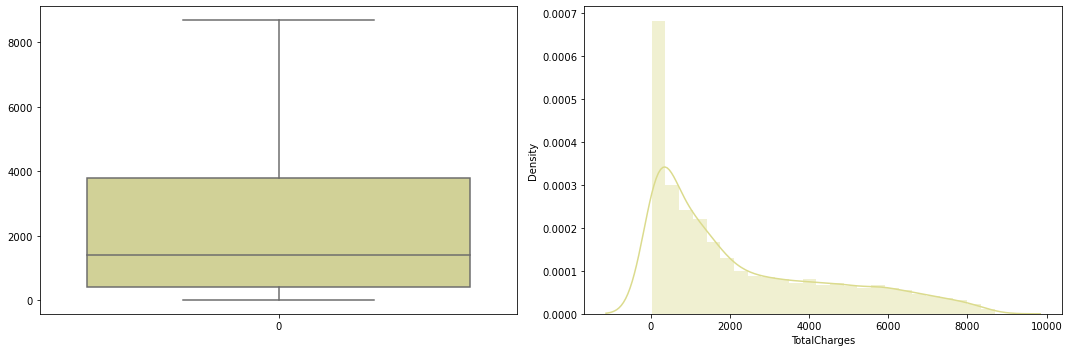

In [246]:
# let's see data distribution in ' TotalCharges ' 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df['TotalCharges'])
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'])

- there are no outliers and data is right skewed so median is not good to go with median so i'll go with mean

In [247]:
# filling null values with mean
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [248]:
df.isna().sum().sum()

0

- null values are filled. now we can move to next step

In [249]:
# spliting into Numerical & Categorical 
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

In [250]:
# checking stats of continous columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.00,0.00,0.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2290.353388,2265.044136,18.80,411.15,1410.25,3801.7,8684.80


In [251]:
# checking stats of categorical columns
df.describe(include=['O']).T

,count,unique,top,freq
gender,7021,2,Male,3541
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087
TechSupport,7021,3,No,3465


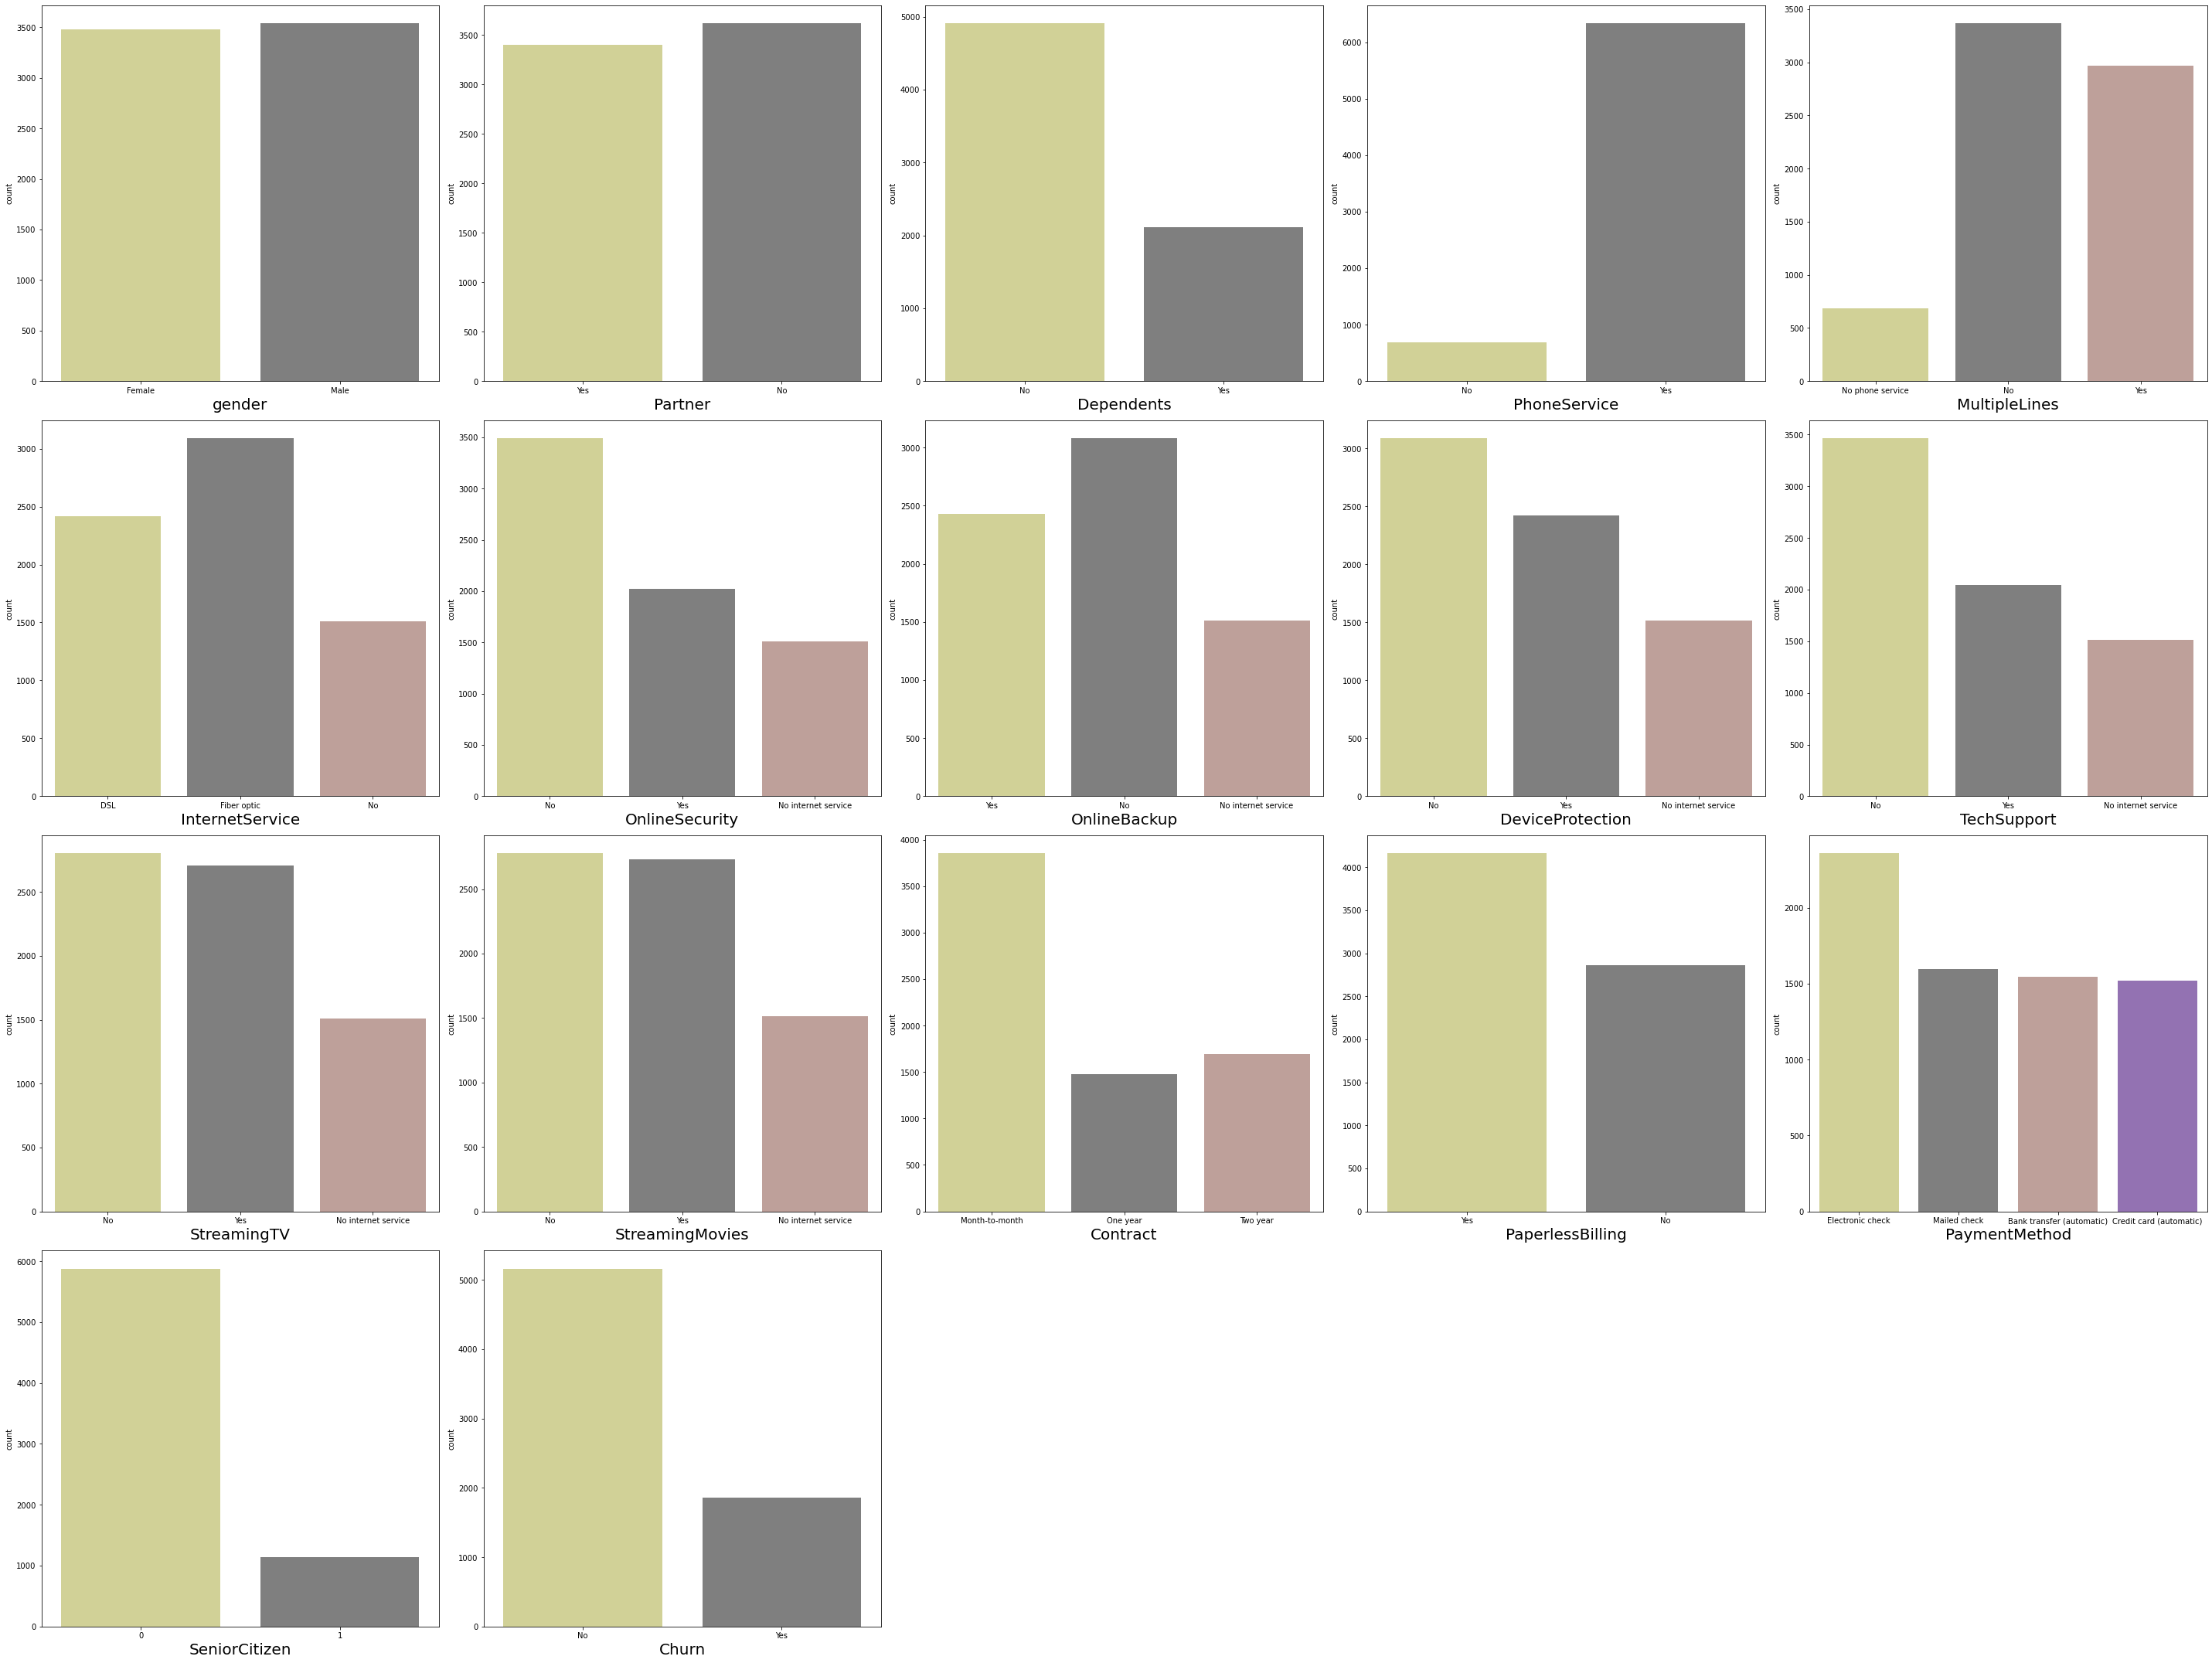

In [252]:
# checking data distribution in categorical columns
plt.figure(figsize=(40,30))
plotnumber =1
for i in Categorical:
    if plotnumber <=18:
        ax = plt.subplot(4,5,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

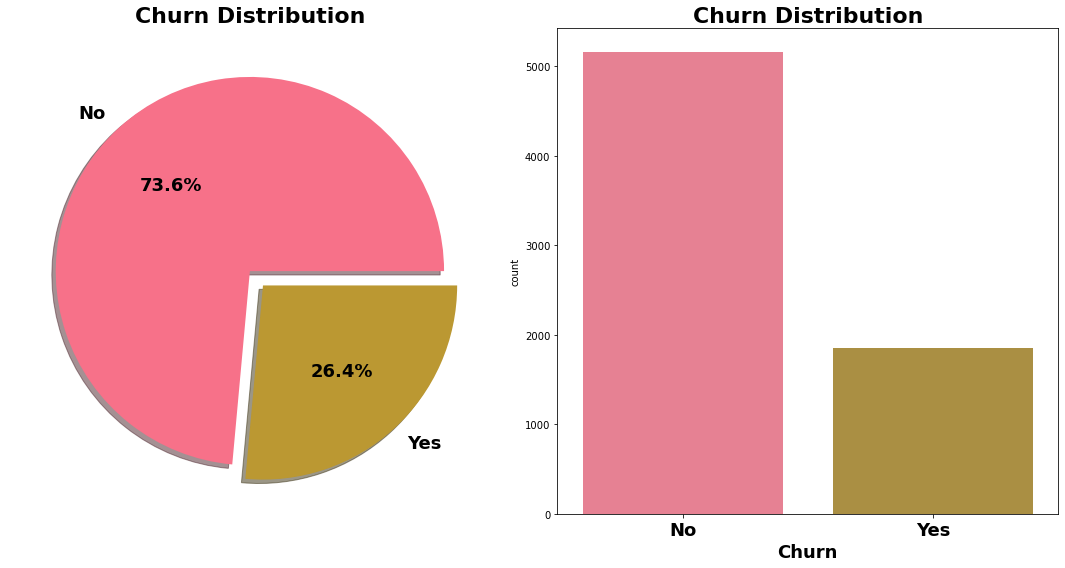

In [253]:
## Target Variable Churn
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

- 26.4 % Customer choose to churn service in last month. Which is quite high number.This all leads to imbalanced data case as churn is our target variable.

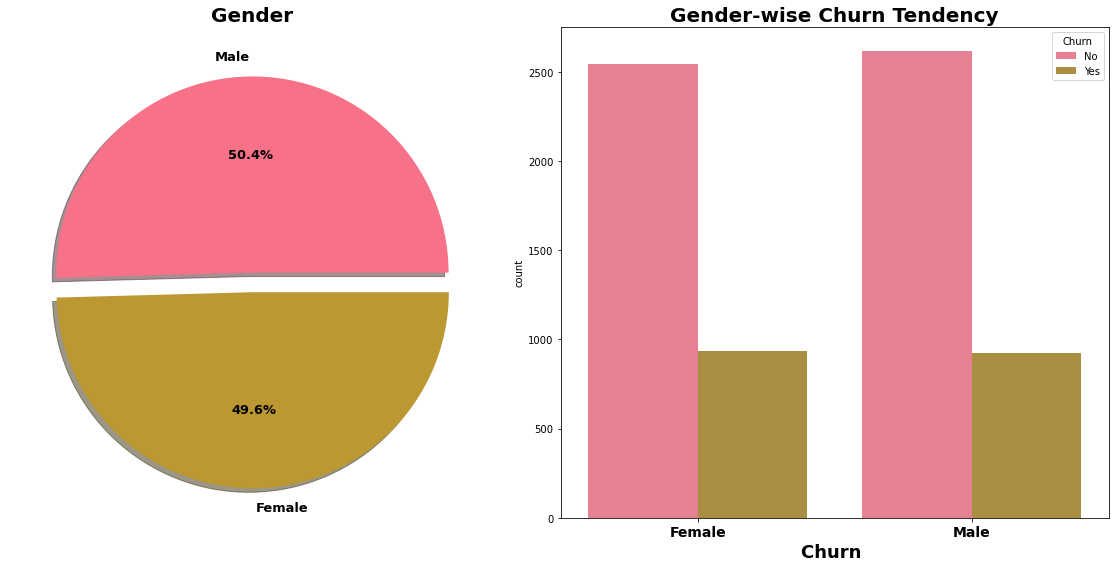

In [254]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [255]:
pd.crosstab(df['gender'],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

Churn,No,Yes,All
gender,,,
Female,2546,934,3480
Male,2618,923,3541
All,5164,1857,7021


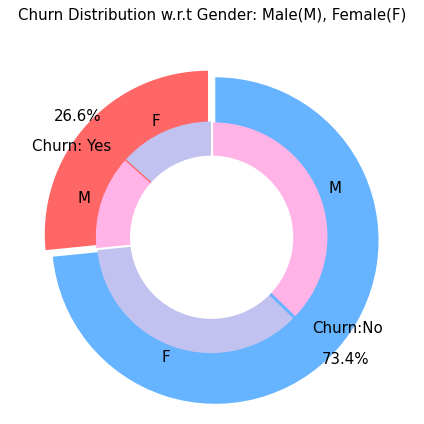

In [256]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

- Data contain both gender almost in same proportion with minor difference.
- Both gender have tendency of attrition in same percentage.

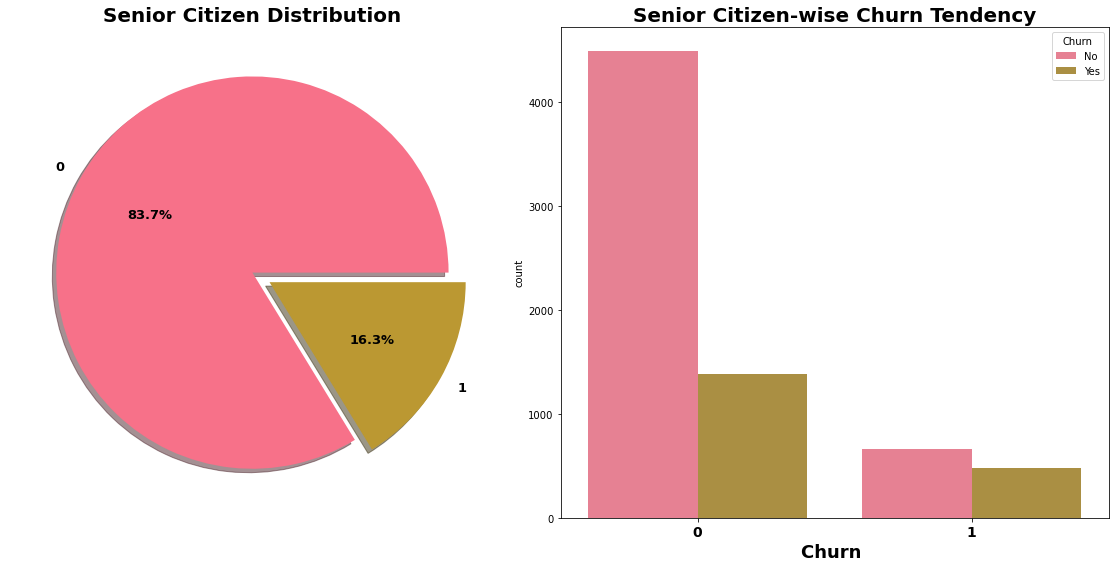

In [257]:
## Lets see how many of them are Senior Citizen and Churn tendency in senior citizen

plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- There are only 16.3 % of the customers who are senior citizens. Thus most of our customers in the data are younger people.

In [258]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

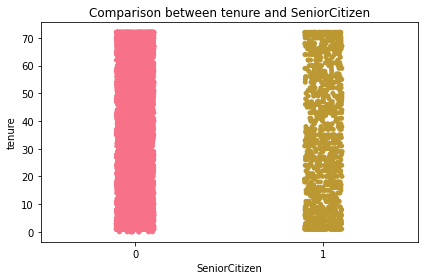

In [259]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

- Around 16% customer are Senior citizen and form countplot we can see they have more tendency to churn.
- There is no significant relation between Senior Citizen and Tenure.

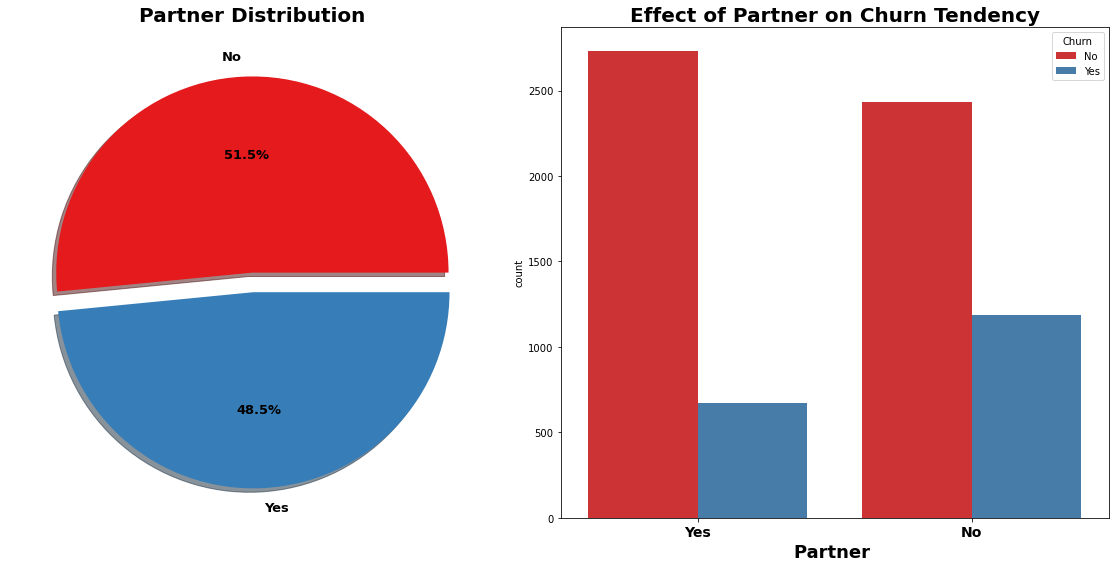

In [260]:
## Effect of Partner and Dependents on Churn
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Partner on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


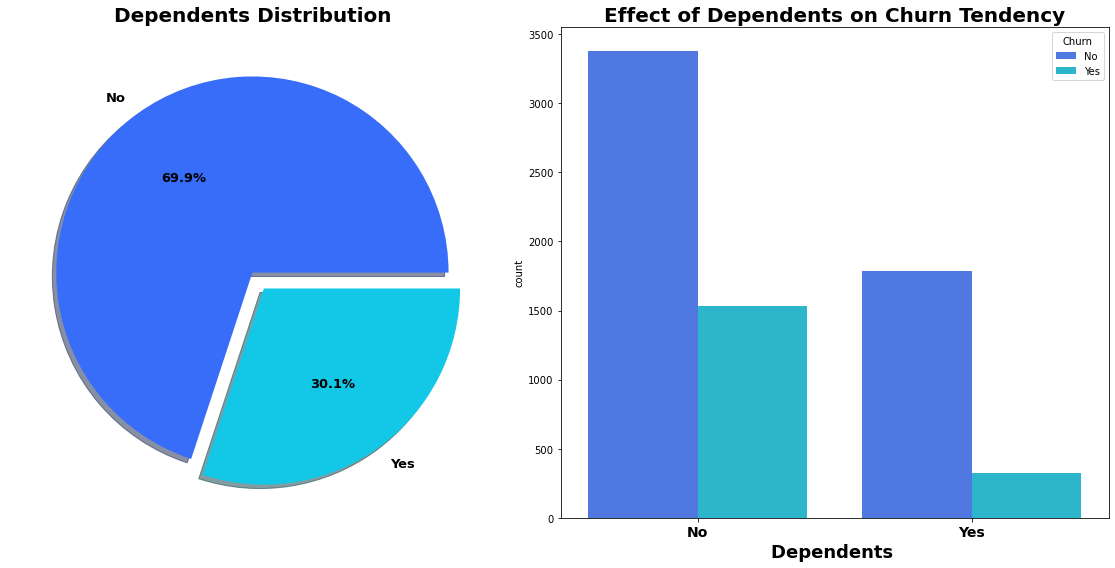

In [261]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- Customer having Partner have less tendency to Churn.
- Almost 30% Customer have dependents on them and they also have less tendency to churn compare to remaining 70%


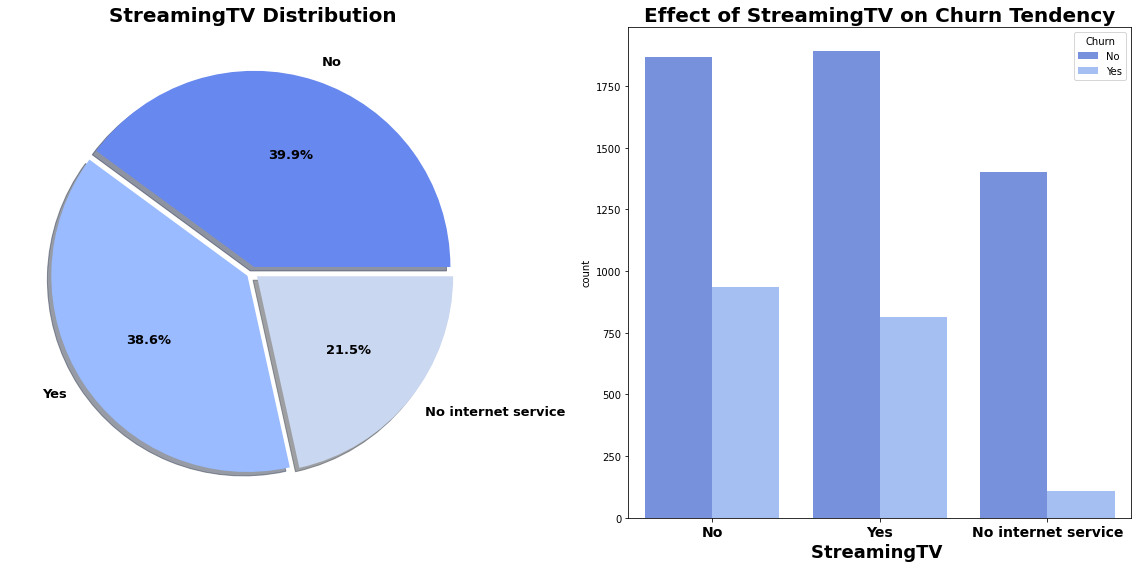

In [262]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingTV ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

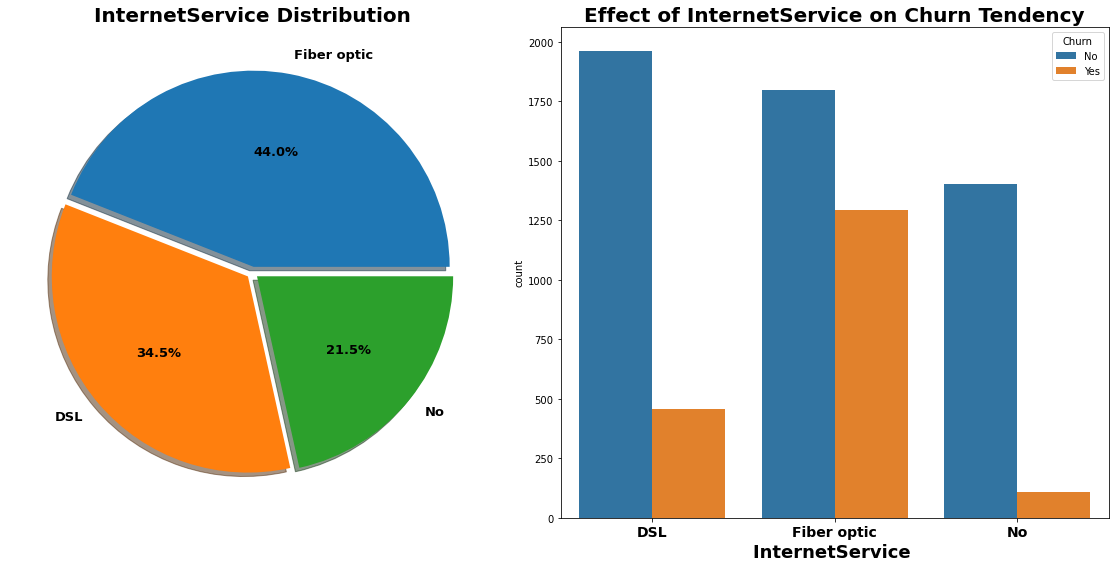

In [263]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("InternetService ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

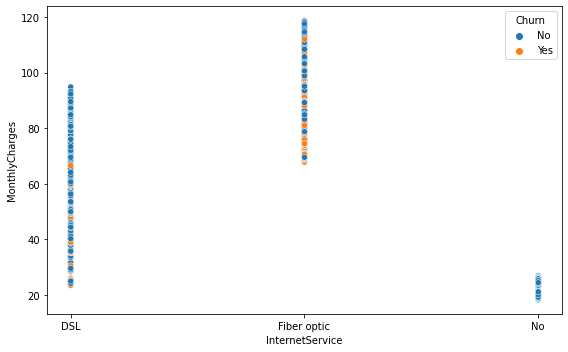

In [264]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

- 44% Customer perfer Fibre optic as Interent service and surpringly we can find high churn rate among them.

- We can find high monthly charges among customer using fiber optic compare to DSL. We can conclude that High charges is reason of customer churn.

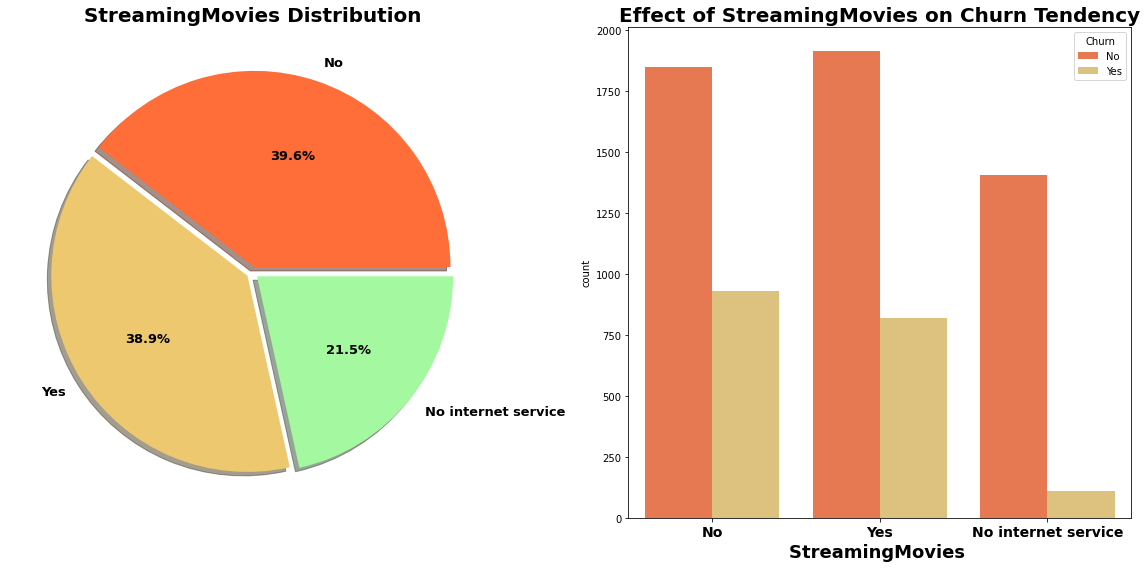

In [265]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingMovies ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- Almost same churn tendency in people streaming movies and not

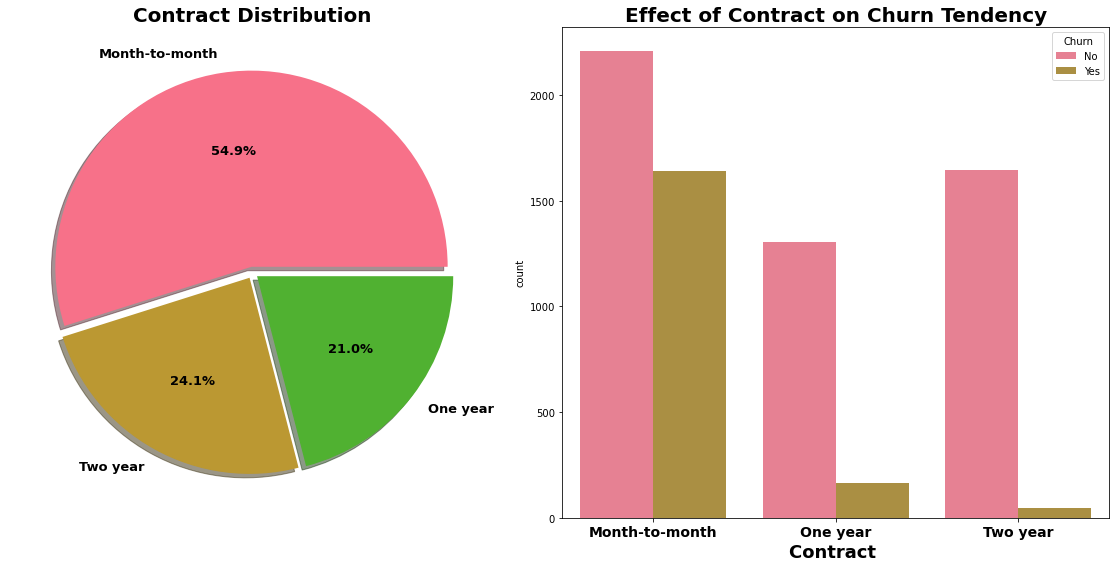

In [266]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

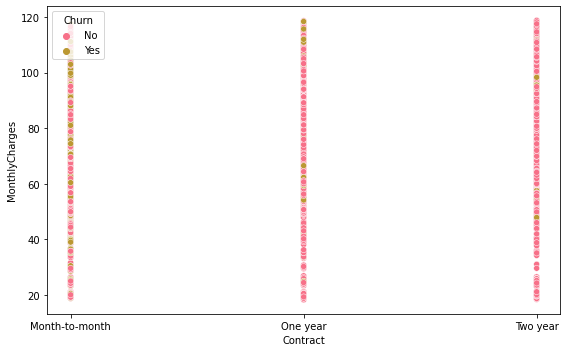

In [267]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

- Almost 55% customer perfer month to month contract compare to other.We also find high churn rate in these customer.

- We did not find any relation between Monthly charges and contract tenure.

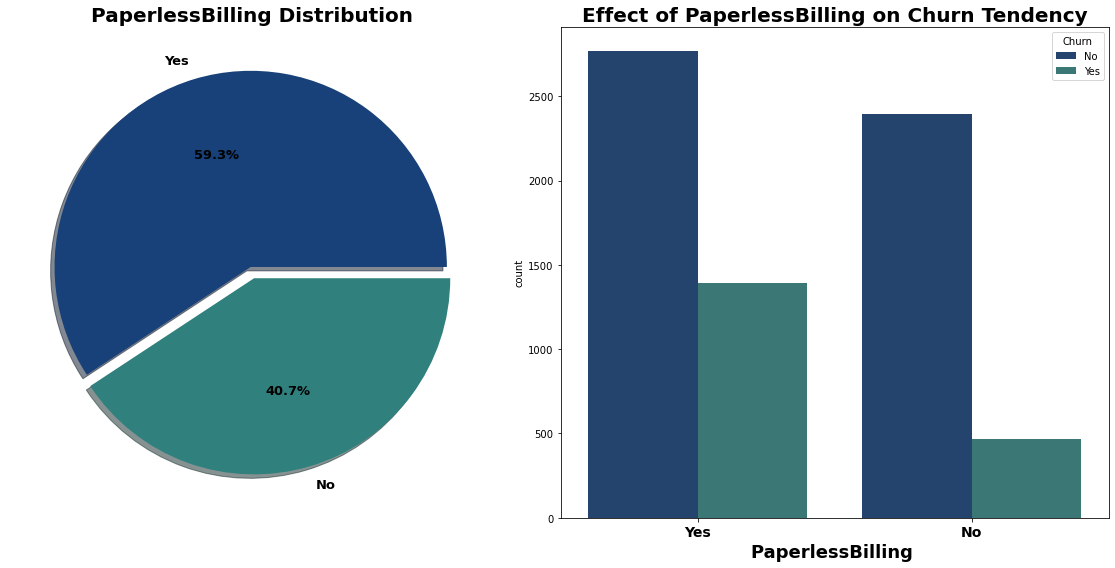

In [268]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_earth')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- 60% Customer perfer paperless billing.

- The customers who prefer paperless billing they have high churn rate.

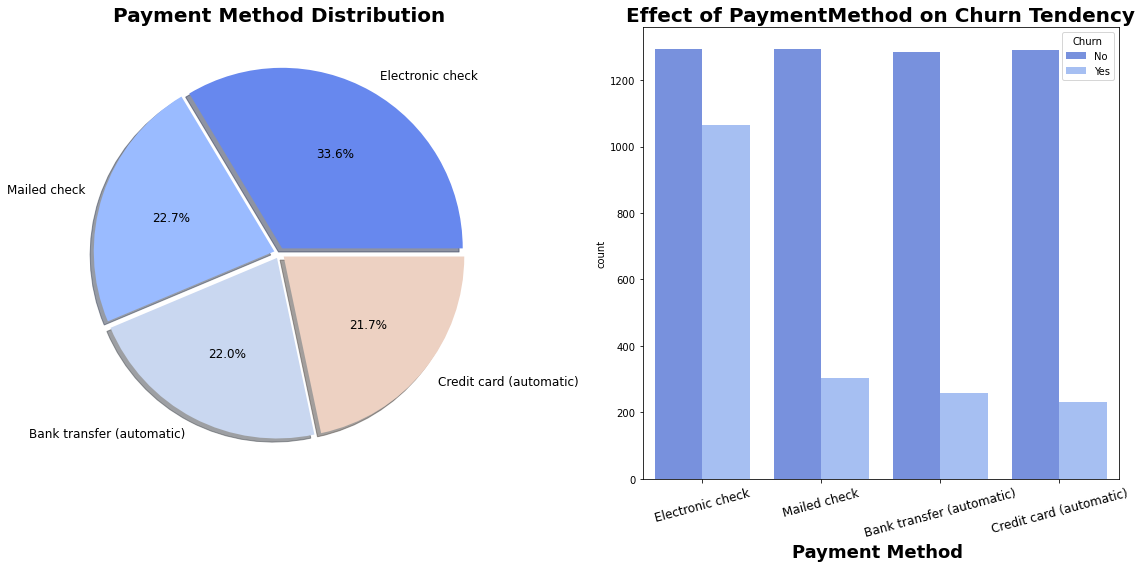

In [269]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

- We can see high Attrition tendency in customer who pay by Electronic check.


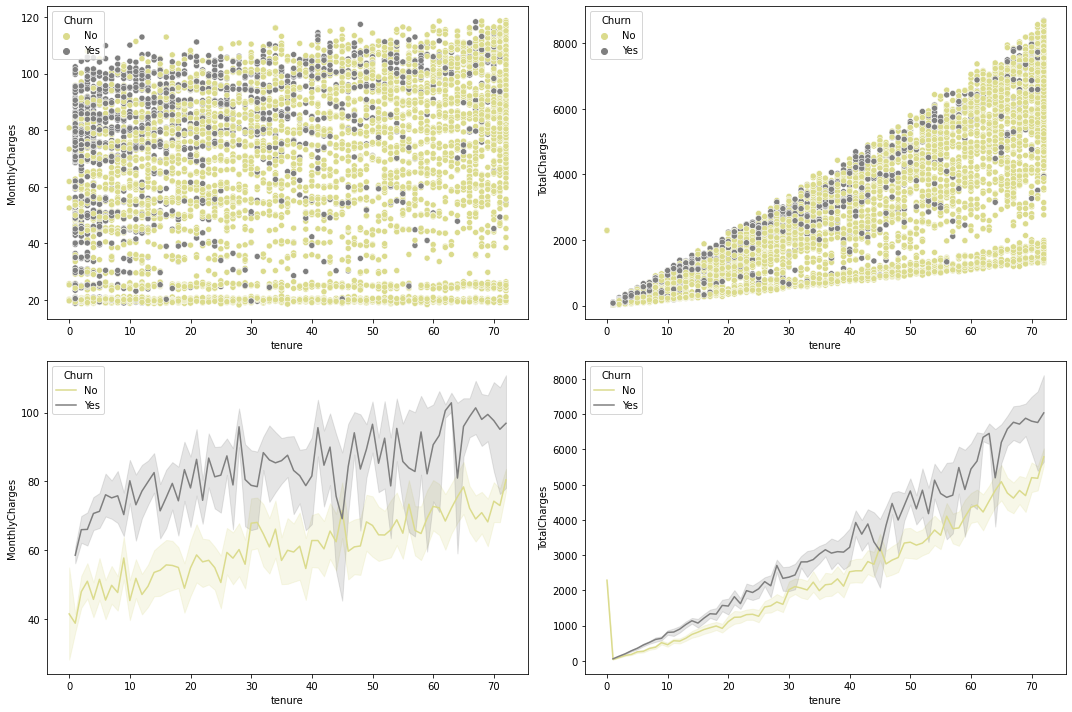

In [270]:
sns.set_palette('tab20_r')
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

- High Monthly Charges in customer who choose churn compare to rest.
- Same goes with High Total Charges in customer who choose churn compare to rest.

In [271]:
Numerical =['tenure','MonthlyCharges', 'TotalCharges']

In [272]:
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [273]:
# # Using Label Encoder on ibject data
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = lab.fit_transform(df[i])

#### Outliers Detection and Removal

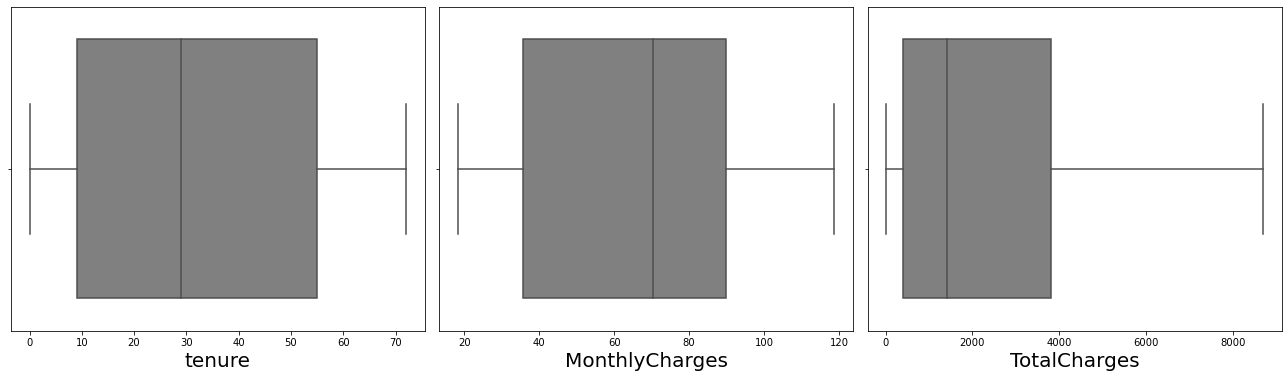

In [274]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='grey')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Outliers removal using Zscore method

In [275]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7021, 20)
Shape of the dataframe after removing outliers:  (6339, 20)
Percentage of data loss post outlier removal:  9.713715994872524


In [276]:

df.drop(['PhoneService'],axis=1,inplace=True)

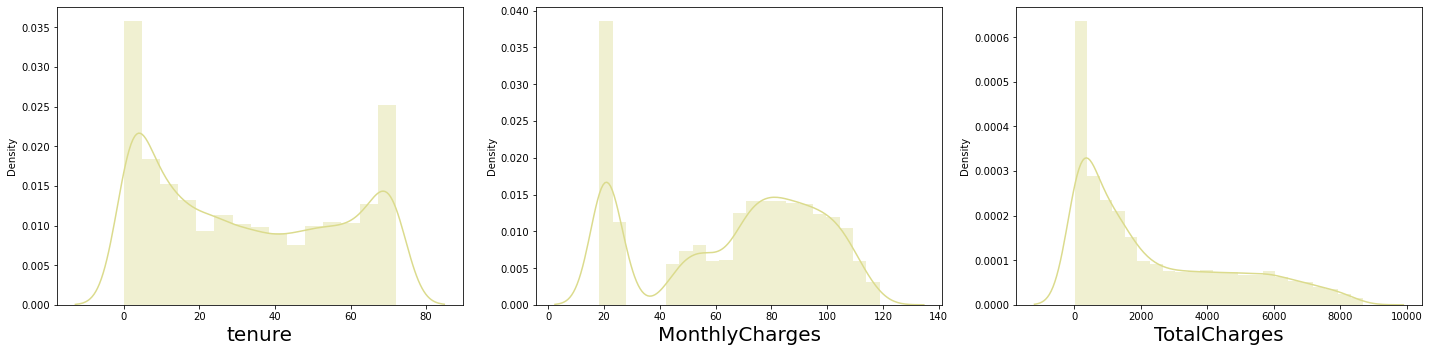

In [277]:
## Skewness of features
plt.figure(figsize=(20,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.



In [278]:
df.skew()

gender             -0.012939
SeniorCitizen       1.819335
Partner             0.049562
Dependents          0.871194
tenure              0.233517
MultipleLines       0.125532
InternetService     0.051965
OnlineSecurity      0.421216
OnlineBackup        0.166121
DeviceProtection    0.181524
TechSupport         0.408970
StreamingTV        -0.005185
StreamingMovies    -0.012505
Contract            0.624212
PaperlessBilling   -0.388673
PaymentMethod      -0.165613
MonthlyCharges     -0.404120
TotalCharges        0.895850
Churn               1.058644
dtype: float64

In [279]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

<AxesSubplot:>

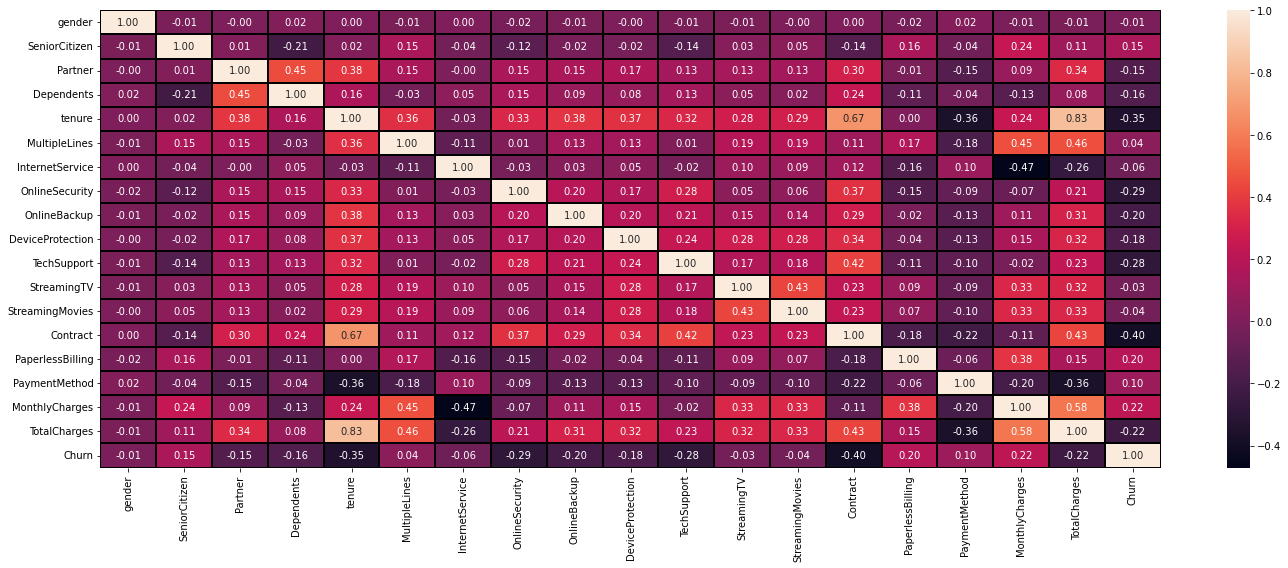

In [280]:
# checking correlation 
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

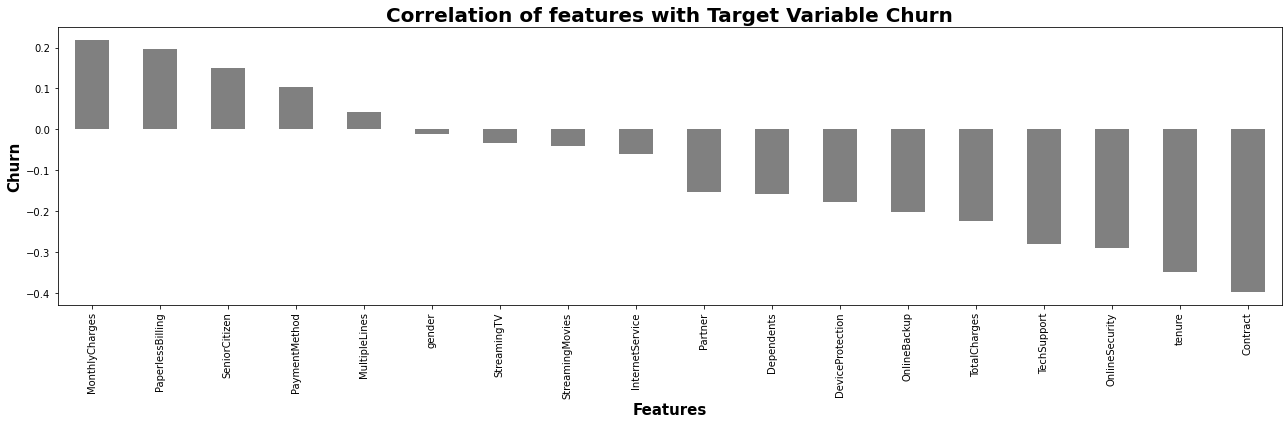

In [281]:
plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color = 'grey')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()

#### Balanceing Imbalanced target feature

In [282]:
df.Churn.value_counts()

0    4652
1    1687
Name: Churn, dtype: int64

As Target variable data is Imbalanced in nature we will need to balance target variable.

In [283]:
## Balancing using SMOTE
from imblearn.over_sampling import SMOTE

# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [284]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [285]:
Y.value_counts()

0    4652
1    4652
Name: Churn, dtype: int64

- We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

In [286]:
## Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [287]:
## Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.016029,gender
1,1.095923,SeniorCitizen
2,1.551270,Partner
3,1.440741,Dependents
4,6.516564,tenure
5,1.432954,MultipleLines
6,1.472237,InternetService
7,1.334002,OnlineSecurity
8,1.244768,OnlineBackup
9,1.301809,DeviceProtection


- Independent feature VIF is within permissible limit of 10

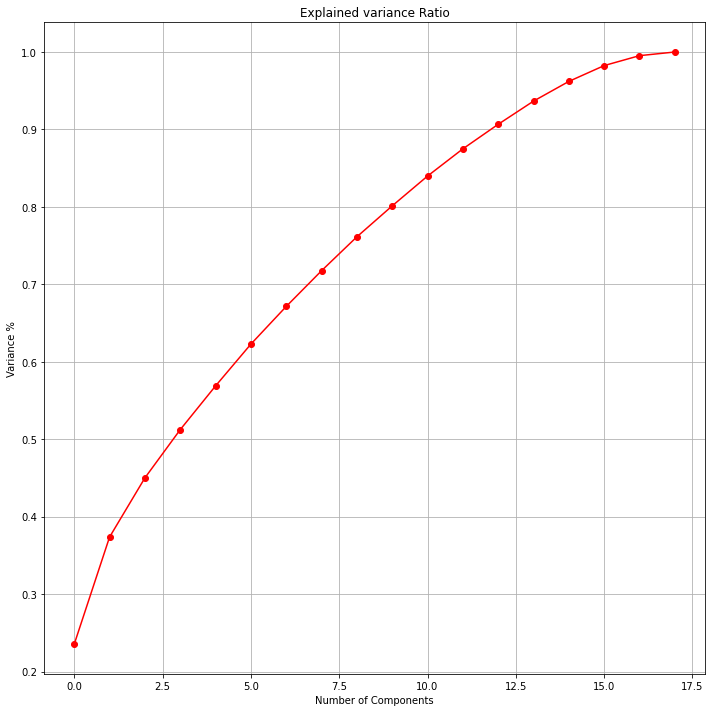

In [288]:
## PCA
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

AS per the graph, we can see that 13 principal components attribute for 90% of variation in the data. We shall pick the first 13 components for our prediction.

In [290]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

## Machine Learning Model Building

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [292]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6512, 13)
Training target vector size: (6512,)
Test feature matrix size: (2792, 13)
Test target vector size: (2792,)


## Finding best Random state

In [293]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8094555873925502 on Random_state 135


In [294]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=90, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8026504297994269


Confusion matrix of Logistics Regression : 
 [[1092  323]
 [ 228 1149]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1415
           1       0.78      0.83      0.81      1377

    accuracy                           0.80      2792
   macro avg       0.80      0.80      0.80      2792
weighted avg       0.80      0.80      0.80      2792



## Finding Optimal value of n_neighbors for KNN

In [295]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.47275332045976226
RMSE value for k=  2 is: 0.488037412253725
RMSE value for k=  3 is: 0.45381225053898117
RMSE value for k=  4 is: 0.45969343216531955
RMSE value for k=  5 is: 0.4565662296568125
RMSE value for k=  6 is: 0.4589136293440278
RMSE value for k=  7 is: 0.4581324991959032
RMSE value for k=  8 is: 0.4549945684363609
RMSE value for k=  9 is: 0.45538799226121673
RMSE value for k=  10 is: 0.4569583003427654
RMSE value for k=  11 is: 0.4565662296568125
RMSE value for k=  12 is: 0.4534174594676999
RMSE value for k=  13 is: 0.45381225053898117
RMSE value for k=  14 is: 0.4502466691017817
RMSE value for k=  15 is: 0.4510414564266491
RMSE value for k=  16 is: 0.44665262490580254
RMSE value for k=  17 is: 0.4549945684363609
RMSE value for k=  18 is: 0.44825353550383795
RMSE value for k=  19 is: 0.45538799226121673
RMSE value for k=  20 is: 0.4518348457054815


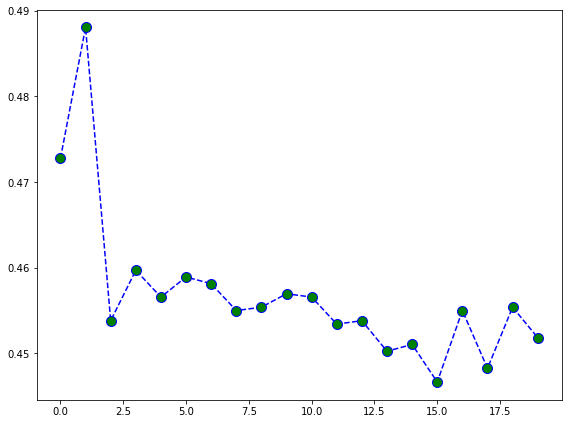

In [296]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

- At k=16, we get the minimum RMSE value which approximately 0.44665262490580254, and shoots up on further increasing the k value. We can safely say that k=16 will give us the best result in this case

## Applying other classification algorithm

In [298]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 16),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8026504297994269


Confusion matrix : 
 [[1092  323]
 [ 228 1149]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1415
           1       0.78      0.83      0.81      1377

    accuracy                           0.80      2792
   macro avg       0.80      0.80      0.80      2792
weighted avg       0.80      0.80      0.80      2792



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8259312320916905


Confusion matrix : 
 [[1113  302]
 [ 184 1193]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      1415
           1       0.80      0.87      0.83      1377

    accuracy                           0.83      2792
   macro avg       0.83      0.83      0.83      2792
weighted avg       0.83      0.83      0

## CrossValidation :

In [299]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.74905965 0.74476088 0.79849543 0.7898979  0.80967742]
Mean Score : 0.7783782565738157
Std deviation : 0.026483011661778945




Cross Validation Score SVC() :

Score : [0.74099946 0.74744761 0.82482536 0.82482536 0.83387097]
Mean Score : 0.7943937529250663
Std deviation : 0.041147313200804676




Cross Validation Score GaussianNB() :

Score : [0.70929608 0.71681891 0.80064481 0.80333154 0.81344086]
Mean Score : 0.7687064417904583
Std deviation : 0.04569908600649068




Cross Validation Score DecisionTreeClassifier() :

Score : [0.68887695 0.70069855 0.78022569 0.77324019 0.79086022]
Mean Score : 0.7467803181316555
Std deviation : 0.0429839146765571




Cross Validation Score KNeighborsClassifier(n_neighbors=18) :

Score : [0.74959699 0.74476088 0.80763031 0.80655562 0.82258065]
Mean Score : 0.7862248877641227
Std deviation : 0.03241647169671783




Cross Validation Score RandomForestClassifier() :

Score : [0.72649113 0.7361633

## Hyper Parameter Tuning : GridSearchCV

In [300]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [301]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.780 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.800 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.774 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.796 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [303]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 70}

## Final Model

In [305]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 70, max_depth=60 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8585243553008596


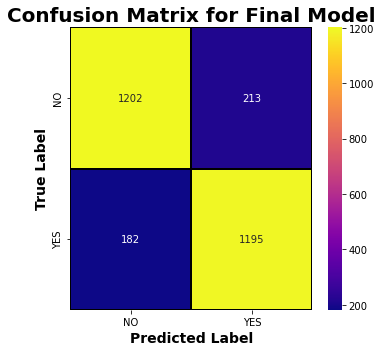

In [306]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

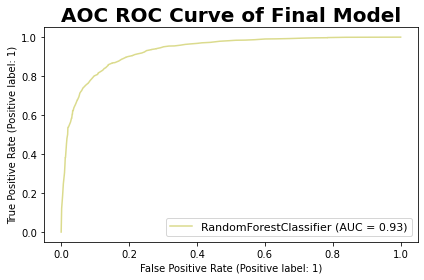

Auc Score :
 0.8586492887954814


In [307]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [308]:
## Saving model
import joblib
joblib.dump(Final_mod,'Customer_Churn_Final.pkl')

['Customer_Churn_Final.pkl']

In [309]:
###Predicting the Final Model
# Prediction
prediction = Final_mod.predict(X_test)
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
